<a href="https://colab.research.google.com/github/Liverson-Al/Exam/blob/main/Covid_19_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

url_new = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
url_death = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
url_vaccine = 'https://raw.githubusercontent.com/govex/COVID-19/master/data_tables/vaccine_data/global_data/time_series_covid19_vaccine_doses_admin_global.csv'
df_new = pd.read_csv(url_new)
df_death = pd.read_csv(url_death)
df_vaccine = pd.read_csv(url_vaccine)

df_new=df_new.drop(labels=["Lat","Long","Province/State"], inplace=False, axis=1)
df_death=df_death.drop(labels=["Lat","Long","Province/State"], inplace=False, axis=1)
df_vaccine=df_vaccine.drop(labels=["UID", "Lat","Long_", "Combined_Key", "Province_State", "Admin2", "FIPS", "code3", "iso3", "iso2", "Population"], inplace=False, axis=1)

i=1
columns=df_new.columns
while(i<len(df_new.index)):
  if (df_new[columns[0]][i]==df_new[columns[0]][i-1]):
    country_name=df_new["Country/Region"][i-1]
    country_index=i-1
    while(df_new[columns[0]][i]==country_name):
      for j in range(1,len(columns)):
        df_new[columns[j]][country_index]+=df_new[columns[j]][i]
      i+=1
  i+=1

i=1
columns=df_death.columns
while(i<len(df_death.index)):
  if (df_death[columns[0]][i]==df_death[columns[0]][i-1]):
    country_name=df_death["Country/Region"][i-1]
    country_index=i-1
    while(df_death[columns[0]][i]==country_name):
      for j in range(1,len(columns)):
        df_death[columns[j]][country_index]+=df_death[columns[j]][i]
      i+=1
  i+=1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


# **ДИНАМИКА НОВЫХ СЛУЧАЕВ**

Enter country: Russia
Show statistics for all time? (y/n): n
Enter first date (MM/DD/YY): 1/1/22
Enter second date (MM/DD/YY): 6/5/22


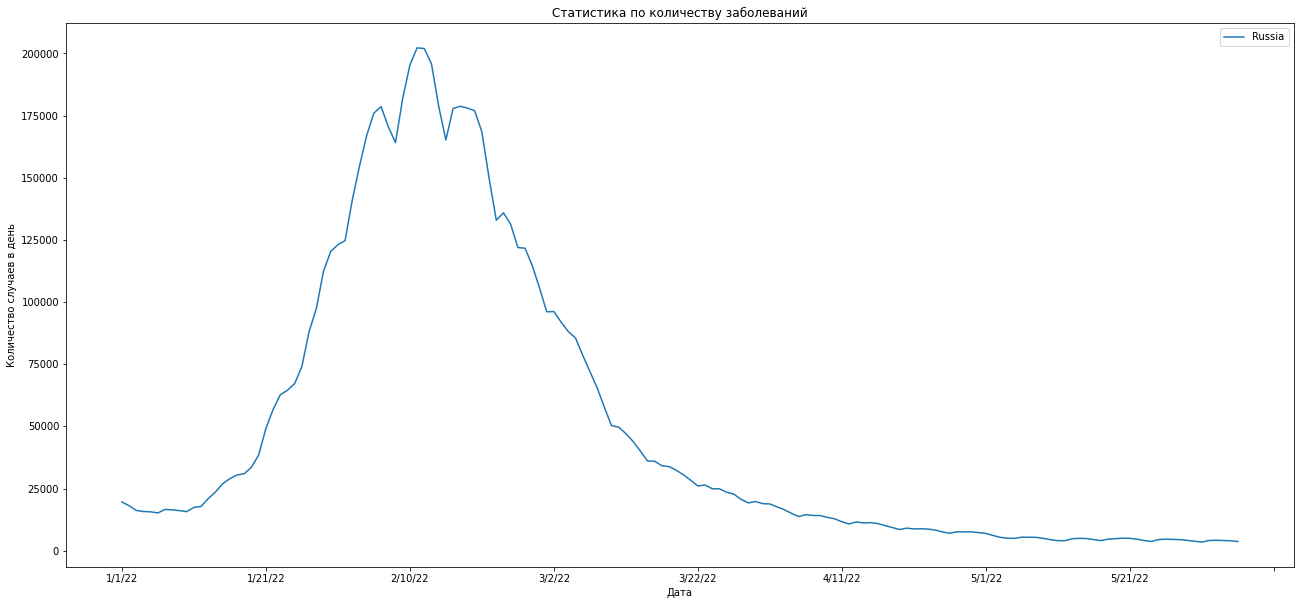

In [91]:
country = input("Enter country: ")
date_check = str.lower(input("Show statistics for all time? (y/n): "))

if (date_check == "n"):
   date1 = str(input("Enter first date (MM/DD/YY): "))
   date2 = str(input("Enter second date (MM/DD/YY): "))
else:
  date1="1/22/20"
  date2=df_new.columns[-1]


df_new_copy=df_new.copy(deep=True)

country_row_new = df_new_copy.loc[(df_new_copy["Country/Region"] == country)]
if (country_row_new.shape[0]>1):
  country_row_new=country_row_new[:][:1]

country_row_new=country_row_new.drop(labels=["Country/Region"], inplace=False, axis=1)

country_row_new=country_row_new.transpose()
country_row_new=country_row_new.rename(columns={country_row_new.columns[0] : country})
shape=country_row_new.shape
i=shape[0]-1
while (i>1):
  country_row_new[country][i]-=country_row_new[country][i-1]
  i-=1
country_row_new=country_row_new[date1:date2]
country_row_new=country_row_new.rename(columns={country_row_new.columns[0] : country})

country_row_new.plot(figsize=(22,10),xlabel="Дата",ylabel="Количество случаев в день",title="Статистика по количеству заболеваний")


# **ДЛИНА КАЖДОЙ ВОЛНЫ**

In [92]:
from scipy.signal import find_peaks
from scipy.signal import argrelextrema

df = pd.read_csv("https://storage.googleapis.com/covid19-open-data/v3/epidemiology.csv")
df = df.set_index('date')

In [105]:
def waves(country):
  data = df[(df['location_key'] == country) & (df['new_confirmed'].notna())]['new_confirmed']

  peaks, _ = find_peaks(data,width=1,distance = 60) # индексы локальных максимумов
  ilocs_min = argrelextrema(data[data != 0].values, np.less_equal,order=1)[0] # индексы локальных минимумов

  bottoms = data[ilocs_min] # данные локальных минимумов
  bottoms = bottoms.drop(bottoms[(bottoms == 0)].index[: bottoms[(bottoms == 0)].index.shape[0]-1]) # удаляем нулевые элементы, если их больше одного

  
  tops = data[peaks] # данные локальных максимумов

  i=0
  j=0
  bottoms_new=[]
  bottoms_new_index=[]
  while(i<len(ilocs_min)):
    ilocs_min_buff=[]
    while(ilocs_min[i]<peaks[j]):
      ilocs_min_buff.append(ilocs_min[i])
      i+=1
      if (i>=len(ilocs_min)):
        break
    buff_data=data[ilocs_min_buff]
    if (buff_data.empty!=True):
      r=0
      bottoms_new.append(buff_data.min())
      for p in buff_data:
        if (p==bottoms_new[-1]):
          bottoms_new_index.append(ilocs_min_buff[r])
          break
        r+=1
    j+=1
  
  i=1
  j=0
  peaks_new=[]
  peaks_new_index=[]
  while(j<len(peaks)):
    peaks_max_buff=[]
    while(ilocs_min[i]>peaks[j]):
      peaks_max_buff.append(peaks[j])
      j+=1
      if (j>=len(peaks)):
        break
    buff_data=data[peaks_max_buff]
    if (buff_data.empty!=True):
      r=0
      peaks_new.append(buff_data.max())
      for p in buff_data:
        if (p==peaks_new[-1]):
          peaks_new_index.append(peaks_max_buff[r])
          break
        r+=1
    i+=1
    if(i>=len(ilocs_min)):
      break

  if (tops[-1] > bottoms[-1]):
    peaks_new.append(tops[-1])
    peaks_new_index.append(peaks[-1])
  
  

  waves_down=[]
  waves_up=[]
  waves_length = []

  for i in range(len(bottoms_new_index)-1):
    waves_length.append(bottoms_new_index[i+1]-bottoms_new_index[i])
  for i in range(len(bottoms_new_index)-1):
    waves_up.append(peaks_new_index[i]-bottoms_new_index[i])

  for i in range(len(peaks_new_index)-1):
    waves_down.append(bottoms_new_index[i+1]-peaks_new_index[i])

  plt.subplots(figsize=(22, 10))
  data.plot()
  plt.plot(peaks_new_index, peaks_new, "v") #локальные максимумы
  plt.plot(bottoms_new_index,bottoms_new,"^") #локальные минимумы
  plt.title(country, fontsize=10)
  plt.show()

  print("Длина спуска волны в днях")
  print(waves_down) 
  print("Длина подъёма волны в днях")
  print(waves_up)
  print("Длина волн в днях")
  print(waves_length)

Enter country: 
RU


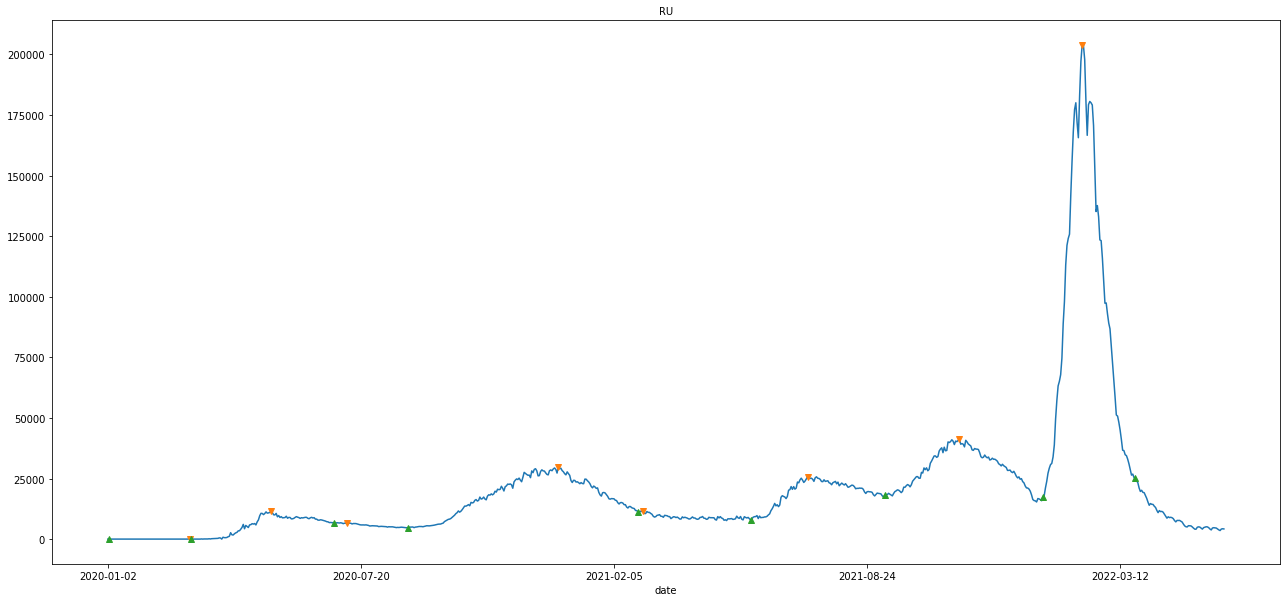

Длина спуска волны в днях
[1, 50, 48, 63, 85, 61, 66]
Длина подъёма волны в днях
[64, 63, 10, 119, 4, 45, 59, 31]
Длина волн в днях
[65, 113, 58, 182, 89, 106, 125, 73]


In [106]:
print("Enter country: ")
country = input()
waves(country)

# **ДИНАМИКА СМЕРТНОСТИ**

Enter country: Ukraine
Show statistics for all time? (y/n): Y


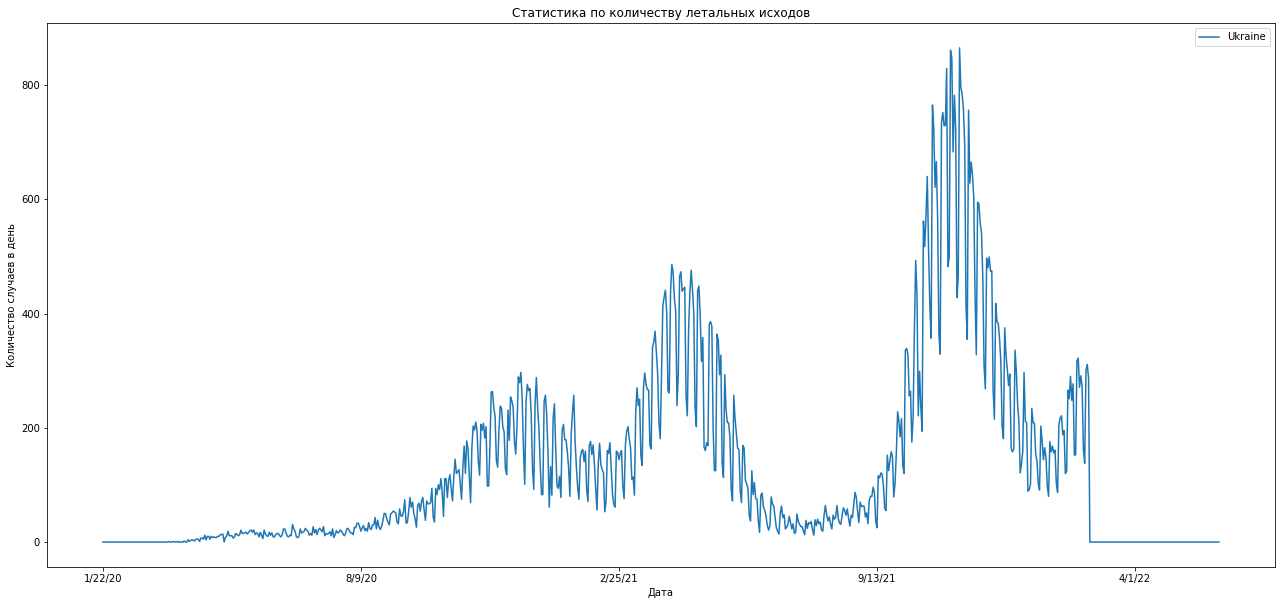

In [94]:
country = input("Enter country: ")
date_check = str.lower(input("Show statistics for all time? (y/n): "))

if (date_check == "n"):
   date1 = str(input("Enter first date (MM/DD/YY): "))
   date2 = str(input("Enter second date (MM/DD/YY): "))
else:
  date1="1/22/20"
  date2=df_death.columns[-1]

df_death_copy=df_death.copy(deep=True)
country_row_new = df_death_copy.loc[(df_death_copy["Country/Region"] == country)]
if (country_row_new.shape[0]>1):
  country_row_new=country_row_new[:][:1]
country_row_new=country_row_new.drop(labels=["Country/Region"], inplace=False, axis=1)

country_row_new=country_row_new.transpose()
country_row_new=country_row_new.rename(columns={country_row_new.columns[0] : country})
shape=country_row_new.shape
i=shape[0]-1
while (i>1):
  country_row_new[country][i]-=country_row_new[country][i-1]
  i-=1
country_row_new=country_row_new[date1:date2]
country_row_new=country_row_new.rename(columns={country_row_new.columns[0] : country})

country_row_new.plot(figsize=(22,10),xlabel="Дата",ylabel="Количество случаев в день",title="Статистика по количеству летальных исходов")

# **ПРОВЕРКА ГИПОТЕЗ: 1) СНИЖАЛОСЬ ЛИ ЧИСЛО НОВЫХ СЛУЧАЕВ С РОСТОМ ВАКЦИНАЦИИ; 2) СНИЖАЛОСЬ ЛИ ЧИСЛО СМЕРТЕЙ С РОСТОМ ВАКЦИНАЦИИ**

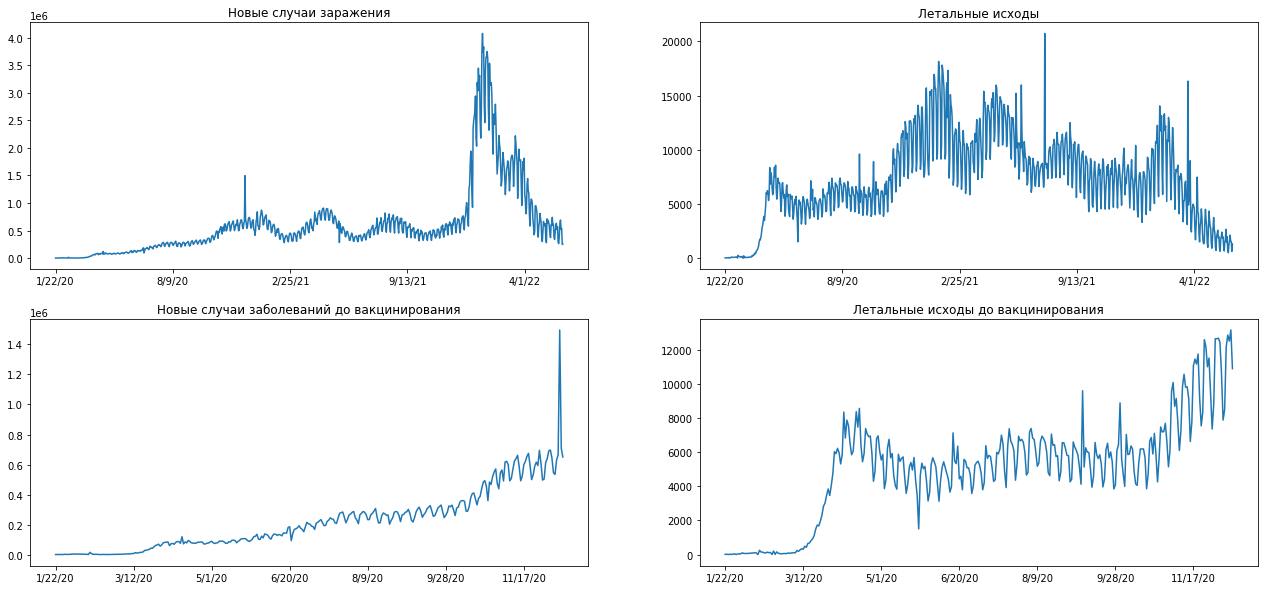

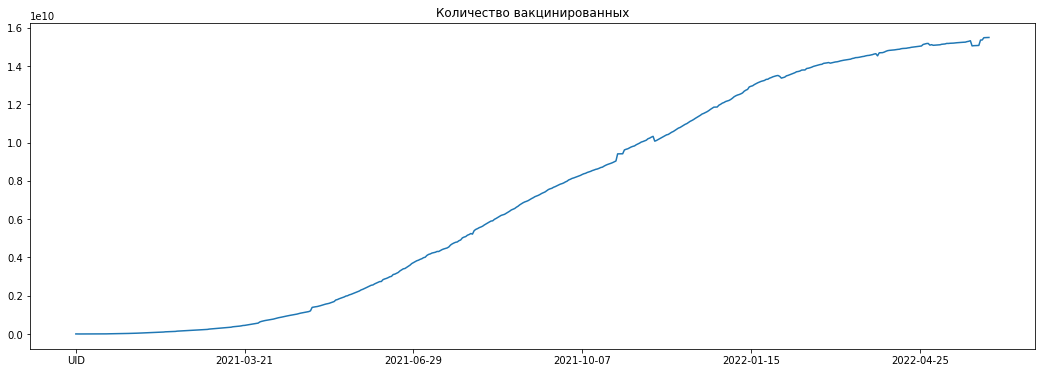

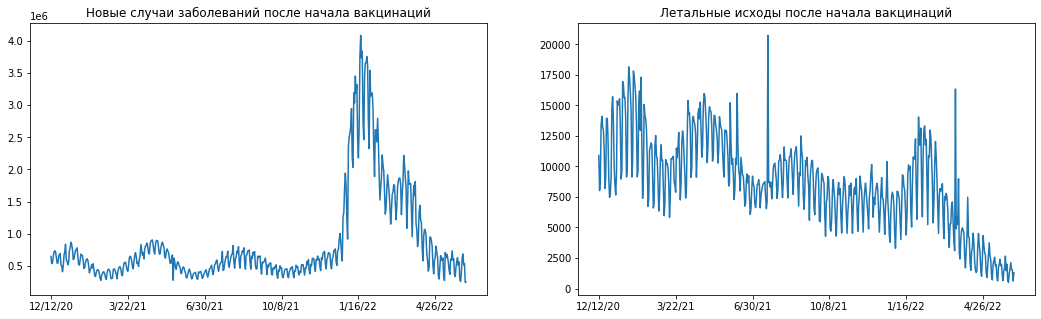

In [96]:

df_new_copy = pd.read_csv(url_new)
df_death_copy = pd.read_csv(url_death)
df_vaccine_copy = pd.read_csv(url_vaccine)

df_new_copy=df_new_copy.drop(labels=["Lat","Long", "Province/State"], inplace=False, axis=1)
df_death_copy=df_death_copy.drop(labels=["Lat","Long", "Province/State"], inplace=False, axis=1)
df_vaccine_copy=df_vaccine_copy.drop(labels=["Lat","Long_", "Combined_Key", "Province_State", "Admin2", "FIPS", "code3", "iso3", "iso2", "Population"], inplace=False, axis=1)
del df_death_copy["Country/Region"]
del df_new_copy["Country/Region"]     
del df_vaccine_copy["Country_Region"]

news = df_new_copy.sum()
deaths = df_death_copy.sum()
vaccines = df_vaccine_copy.sum()

s = len(news)
cols = news.index 
while(s>2):
  news[cols[s-1]] -= news[cols[s-2]]
  s-=1

s = len(deaths)
cols = deaths.index 
while(s>2):
  deaths[cols[s-1]] -= deaths[cols[s-2]]
  s-=1

date1="1/22/20"
date2="12/12/20"
date_end = cols[-1]



news_before=news[date1:date2]
deaths_before = deaths[date1:date2]
news_after = news[date2:date_end]
deaths_after = deaths[date2:date_end]

plt.figure(figsize=(22, 10))
plt.subplot(2, 2, 1)
news.plot(title = "Новые случаи заражения")
plt.subplot(2, 2, 2)
deaths.plot(title = "Летальные исходы")
plt.subplot(2, 2, 3)
news_before.plot(title = "Новые случаи заболеваний до вакцинирования")
plt.subplot(2, 2, 4)
deaths_before.plot(title = "Летальные исходы до вакцинирования")
plt.show()

plt.figure(figsize=(18, 6))
vaccines.plot(title = "Количество вакцинированных")
plt.figure(figsize=(18, 5))
plt.subplot(1, 2, 1)
news_after.plot(title = "Новые случаи заболеваний после начала вакцинаций")
plt.subplot(1, 2, 2)
deaths_after.plot(title = "Летальные исходы после начала вакцинаций")

Исходя из графиков можно сделать вывод, что вакцина помогла людям перености заболеваемость без летальных исходов, но никак не спасла от заражаемости

Топ 15 стран по количеству смертей от Covid-19 за всё время его существования

<BarContainer object of 16 artists>

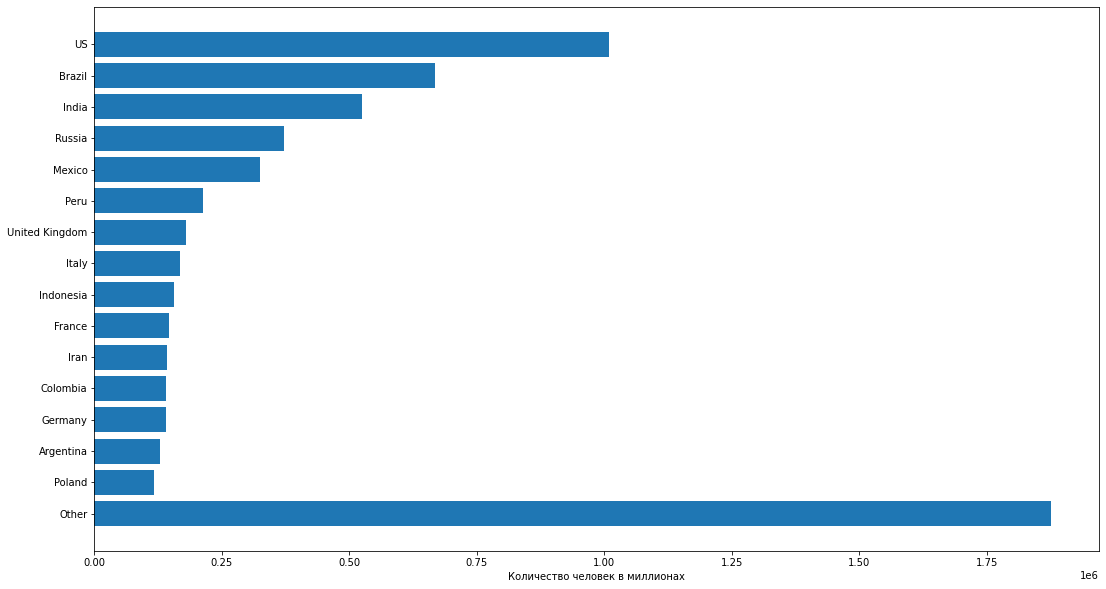

In [103]:
df_death = pd.read_csv(url_death)
df_death=df_death.drop(labels=["Lat","Long", "Province/State"], inplace=False, axis=1)

result = []
for q in df_death.iloc:
  result.append((q[0], q[-1]))

result.sort(key = lambda x: x[1])
other = sum(i[1] for i in result[:-15])
result = result[-15:]
result.insert(0, ("Other", other))
plt.figure(figsize=(18, 10))
plt.xlabel("Количество человек в миллионах")
plt.barh([i[0] for i in result], [i[1] for i in result])

На данном графике можено заметить преобладание довольно развитых стран и отсутствие африканских, поэтому давайте посмотрим на топ 15 стран по проценту смертности 

<BarContainer object of 15 artists>

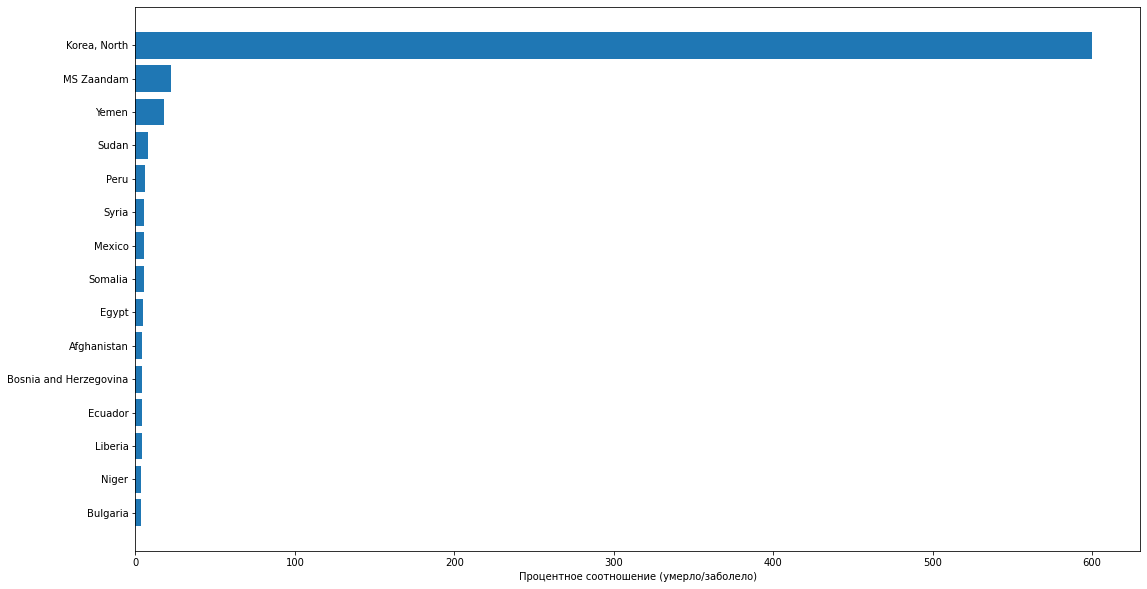

In [104]:
df_new = pd.read_csv(url_new)
df_death = pd.read_csv(url_death)
df_death_copy = df_death.copy()
df_new_copy=df_new.copy()
result1 = dict()
uniq=df_new_copy["Country/Region"].unique()

for i in uniq:
  buff=df_new_copy.loc[(df_new_copy["Country/Region"] == i)]
  if (buff.shape[0]>1):
    buff=buff[:][:1]
  result1.update({i:buff[buff.columns[-1]][buff.index[0]]})

result2 = dict()
uniq=df_death_copy["Country/Region"].unique()

for i in uniq:
  buff=df_death_copy.loc[(df_death_copy["Country/Region"] == i)]
  if (buff.shape[0]>1):
    buff=buff[:][:1]
  result2.update({i:buff[buff.columns[-1]][buff.index[0]]})

result=dict()

for i in result1:
  result.update({i:result2[i]/result1[i]*100})

result = sorted(result.items(), key=lambda x: x[1])

result = result[-15:]
plt.figure(figsize=(18, 10))
plt.xlabel("Процентное соотношение (умерло/заболело)")
x=[]
y=[]
for i in result:
  x.append(i[0])
  y.append(i[1])
plt.barh(x,y)

На данном графике можно заметить преобладание африканских стран. Это скорее всего связано с низким развитием в области медицины этих стран. Так же нельзя не заметить 600 % смертности у Северной Кореи. Из этого можно сделать вывод, что некоторые страны скрывают информацию о коронавирусе.